<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-December/blob/main/22-02-02-Decision_Tree/Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Notes](https://1drv.ms/u/s!AmSu_rSXl5m3iTEdiabV6_MYBrJL?e=oF6eBq)

In [ ]:
import plotly.express as px
import numpy as np
import pandas as pd

In [ ]:
iris = px.data.iris()
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
109,7.2,3.6,6.1,2.5,virginica,3
138,6.0,3.0,4.8,1.8,virginica,3
11,4.8,3.4,1.6,0.2,setosa,1
36,5.5,3.5,1.3,0.2,setosa,1
61,5.9,3.0,4.2,1.5,versicolor,2


In [ ]:
px.scatter(iris, x = 'petal_length', color = 'species_id')

In [ ]:
px.scatter(iris, x = 'sepal_length', color = 'species_id')

# Even Odd

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(6)
y = x%2

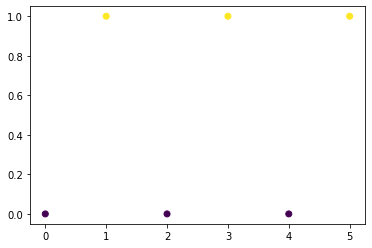

In [ ]:
plt.scatter(x, y, c = y)

In [ ]:
X = x.reshape(-1, 1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

In [ ]:
model.predict([[100], [101]])

array([1, 1])

In [ ]:
model.score(X, y)

1.0

In [ ]:
from sklearn import tree

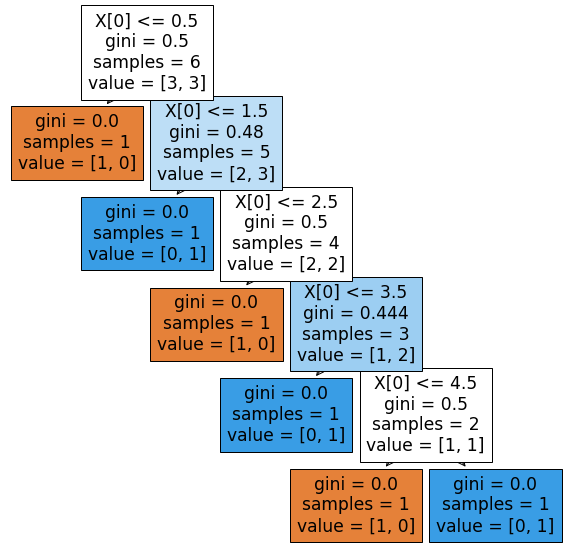

In [ ]:
plt.figure(figsize = (10, 10))

tree.plot_tree(model, filled = True)
plt.show()

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sjwhitworth/golearn/master/examples/datasets/tennis.csv')
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


# Entropy Gini

In [ ]:
x1 = np.linspace(0, 1, 15)
x2 = 1-x1

ye = -x1*np.log2(x1) - x2*np.log2(x2)
yg = 1 - (x1*x1 + x2*x2)

ye[0] = 0  # p(x1) = 0
ye[-1] = 0 # p(x2) = 0

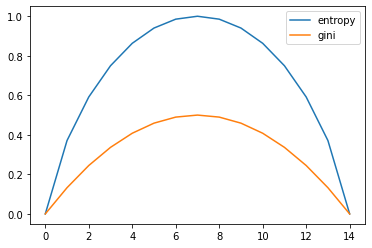

In [ ]:
plt.plot(ye, label = 'entropy')
plt.plot(yg, label = 'gini')
plt.legend()

In [ ]:
a = 5/14
b = 1 - a

-a*np.log2(a) -b*np.log2(b)

0.9402859586706311